# S2I: Data Science Final Project - Travel

Data science final project: Travel - Luca Ganzedda

The aim of the project is to analyze the customer satisfaction of an airline company

Before joining the EDA, let's breakdown the problem.
- What is the problem?
An airline company has asked to us to check how the satisfaction of the clients is affected. They want to understand how they can improve their services based on a client survey.
- Why does the problem need to be solved?
The company wants to increase the overall satisfaction of its customers and the General manager needs input for the next business planning of the airline company. 
Another reason is to increase revenue, to raise the overal image of the company, and to improve the service & products.







#EDA: Introduction to the Exploratory Data analysis

EDA - exploraty data analysis.

We have 2 dataset:
- Train
- Test

For the EDA, we'll combine all dataset and we start to explore the dataset.

Steps:


1.   Analyze overal dataset dataset. 
  - Take a look on which features we have. 
  - Classify them (quantitative or qualitative. Numeric or categorical, Numeric: continuous or discrete Categorical: ordinal or nominal)
  
2. Dive into each features
  - Check & handle duplicate date
  - Check & handle missing data
  - Statistical analysis
  - Graph analysis
3. Make question relevants to the problem.
  - Check variable that we need for answering
  - Compute statistics metrics
  - Graph analysis (if needed)
  - Elaborte answer
4. Feature engineering:
  - Split train & test set
  - Encode nominal categorical variable
  - Encode continous numeric variable 

5. Feature Selections: Analyze correlation between variables
  - Multicollinearity (numeric variable)
  - Feature importance Y as main benchmark:
    - Pearson correlation: numeric variable 
    - Chi2: nominal variable
  - Underline key findings 




## Analyze dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random


#ignore warnings
import warnings
warnings.filterwarnings('ignore') 

#basic graphical setting
sns.set() 



In [2]:
#import dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

#check train dataset
df_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
#check test dataset
df_test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


We have both a train and test dataset. For the EDA, I prefer to use the entire dataset available to me to gain a thorough understanding of the data

In [4]:
#merging the 2 dataset
df = pd.concat([df_test, df_train], axis = 0)
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


The indices are duplicated, as we have both a Dataset index and an "Unnamed: 0" column. Before removing the "Unnamed: 0" column, we should check if there are any duplicates in the index.

In [5]:
#check if there are some duplicate in client id. I want to use this as index
df.duplicated(subset = 'id').any()

False

Ok no duplicate. I'll use id as index, I'll remove all these column:
- Unnamed: 0
- index
I'll change the name of id = client_id

In [6]:
#change id column name
df = df.rename(columns = {'id':'client_id'})
#set index
df = df.set_index('client_id')
#drop the the unnamed column
df = df.drop('Unnamed: 0', axis = 1)

In [7]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
client_id,,,,,,,,,,,,,,,,,,,,,
19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [8]:
#Overal dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 19556 to 62567
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    1

We have 129,880 entities in our dataset with 22 features, including our target variable "y" for satisfaction. From this information, it appears that the "Arrival Delay in minutes" variable has some null values, while all the other features seem to be in good condition. We can divide the nominal features as follows:

- Numeric discrete: Age
- Numeric continuous: Arrival delay in minutes, Departure delay in minutes
- Categorical nominal: Gender, Customer Type, Type of Travel, Class
- Categorical ordinal: all the others



Note: I noticed a difference between the departure and arrival delay variables. Let's investigate these two variables.

In [9]:
#firstly let's check NA value
count_null = df['Arrival Delay in Minutes'].isnull().sum()
print(f'There are {count_null} null values, in the column "Arrival Delay in Minutes"')
#overview of null row
df[df.isnull().any(axis = 1)].head()

There are 393 null values, in the column "Arrival Delay in Minutes"


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
client_id,,,,,,,,,,,,,,,,,,,,,
107365,Female,Loyal Customer,21,Personal Travel,Eco,632,1,5,1,4,...,2,4,2,5,4,5,2,9,NaN,neutral or dissatisfied
108648,Male,Loyal Customer,9,Personal Travel,Eco,762,2,5,2,2,...,4,2,5,2,5,2,4,51,NaN,neutral or dissatisfied
16797,Male,disloyal Customer,25,Business travel,Eco,1017,3,4,4,5,...,5,2,5,2,3,2,5,126,NaN,neutral or dissatisfied
30090,Male,Loyal Customer,7,Personal Travel,Eco,399,4,5,4,4,...,4,4,3,1,1,4,4,0,NaN,neutral or dissatisfied
41924,Female,Loyal Customer,58,Business travel,Eco,129,5,3,3,3,...,5,5,5,5,3,5,5,3,NaN,satisfied


In [10]:
#compute the median & mean
arr_col_name = 'Arrival Delay in Minutes'
median = df[arr_col_name].median()
mean = df[arr_col_name].mean()

print(f'Median {round(median,2)} \n Mean {round(mean, 2)}')

Median 0.0 
 Mean 15.09


As we have many entities (around 129k), only 390 of which have a null value in just one feature. The mean value of the "Arrival Delay in minutes" feature is significantly higher than the median, indicating the presence of outliers in the data.

My assumption is that some clients may have forgotten to add the arrival delay in the questionnaire. To avoid affecting other features, I'll handle null values by replacing them with the median. This approach won't significantly impact the dataset, and we can keep all other features for these entities. Using the median instead of the mean is a good choice since it's less affected by outliers, and therefore, the impact on the data should be minimal.

In [11]:
#replace NaN value with the median of the column
df[arr_col_name] = df[arr_col_name].fillna(median)

Change dataformat: The data type is currently set to float, while all other features have int64 data type. Before changing the data type, let's check if there are any float values that need to be rounded.

In [12]:
arrival_delay = df['Arrival Delay in Minutes']
#check if some numbers have decimals.
for x in arrival_delay:
    if str(x)[-1] != '0':
        print(x)

As we don't get any output, no decimals. Perfect, we can change the format of this column in int64, like "Departure Delay in Minutes"

In [13]:
#change the format
df[arr_col_name] = df[arr_col_name].astype('int64')
arr_type = df[arr_col_name].dtype
print(f'The type of the column {arr_col_name} is {arr_type}')

The type of the column Arrival Delay in Minutes is int64


Let's have an overview of all categorical variable which have "object" type and their distribution

In [14]:
#select object variables (nominal categorical variable)
cat = [var for var in df if df[var].dtype == 'O']

#Check distribution and feature n
print('Value expresed in %')

for var in cat:
    counts = df[var].value_counts()
    distribution = round(counts / sum(counts) * 100, 2)
    
    print(f'\n Feature: {var}: {distribution[0]}') 


Value expresed in %

 Feature: Gender: 50.74

 Feature: Customer Type: 81.69

 Feature: Type of Travel: 69.06

 Feature: Class: 47.86

 Feature: satisfaction: 56.55


In [15]:
#Standard hist graph function

''''
Corrected:

"Customize function for histogram graph. 
Parameters: df (database), y (y-axis), column (feature name), title (graph title), figsize (default is 8,6 but can be customized)."
'''

def graph_hist(df,y: str, column: str, title: str , figsize = [8,6]):
      
    #set graph
    plt.figure(figsize = (figsize[0], figsize[1]))
    
    #graph title
    plt.title(title, fontsize = 20, va = 'center', pad = 10)
    
    #random color
    colors = sns.color_palette("Paired", len(cat))
    random.shuffle(colors)
    
    #graph type (countplot)
    ac = sns.countplot(data = df,
                 x = column,
                 palette = colors)

    #change y label
    plt.ylabel(y, fontsize = 20)
    
    #No x label
    plt.xlabel('');

    #size of tick
    plt.tick_params(axis='both', which='major', labelsize=10)

    #set max 5 bin on x axis
    ac.yaxis.set_major_locator(plt.MaxNLocator(5))

    #add % in the graph
    total = len(df)
    
    #save how many feature there are (based on that I'll adjust the annotation position)
    category = df[column].nunique()
    
    #loop for annotate %
    for p in ac.patches:
        percentage = str(round(100 * p.get_height()/total,2))
        x = p.get_x() + p.get_width() / 2 
        y = p.get_y() + p.get_height() / 2
        ac.annotate(percentage, (x, y), size = 30 - 2.5*category, ha = 'center') #annotate % value
    
    #return graph
    return plt.show() 


#return Variable statistic
def count_values(df, feature):
    values = df[feature].value_counts() #value counts

    print(f"Value distribution \n{values}")
        
 
    

## Variable analysis


Let's investigate each nominal categorical variable:
- Gender
- Customer Type
- Type of Travel
- Class


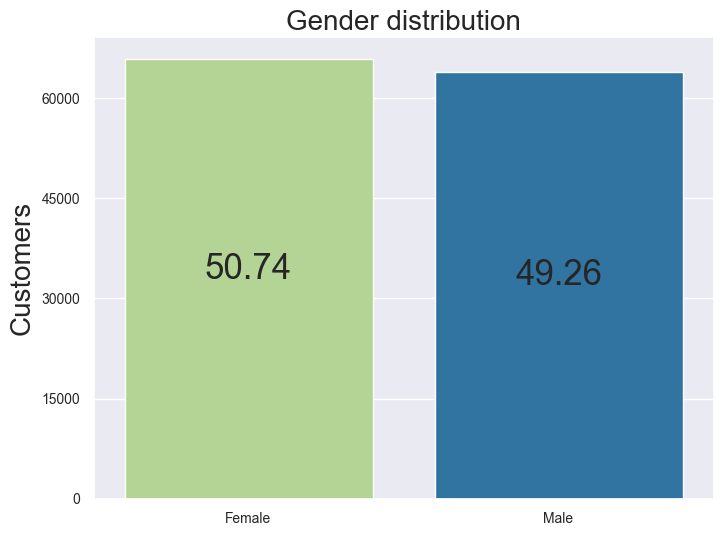

Value distribution 
Female    65899
Male      63981
Name: Gender, dtype: int64


In [16]:
#graph Gender
graph_hist(df, y = "Customers", 
           column = "Gender", 
           title = "Gender distribution")

#gender values
count_values(df, "Gender")


The customers is equaly distributed between Female & Male with really light difference. 
The data is representative of the population. No bias related to the Gender distribution. 


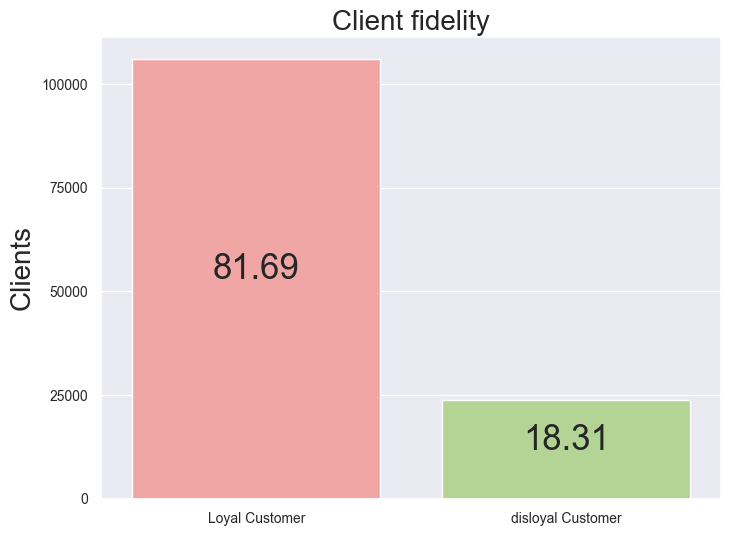

Value distribution 
neutral or dissatisfied    73452
satisfied                  56428
Name: satisfaction, dtype: int64


In [17]:
#Graph
graph_hist(df, y = "Clients",
           column = 'Customer Type',
           title = "Client fidelity")

#gender values
count_values(df, var)


According to the dataset, the majority of customers (81%) are categorized as "Loyal Customer". It can be assumed that "Loyal" refers to customers who are enrolled in a loyalty program. 

As loyalty programs are typically designed to reward and retain satisfied customers, it can be inferred that a significant proportion of the airline's customers are satisfied with their services. 

However, the highly skewed distribution towards "Loyal Customer" may introduce bias in the data interpretation. 
To address this, one potential avenue of research could be to investigate the factors that dissatisfy "Disloyal Customers" and explore ways to improve the airline's services to attract and retain these customers.


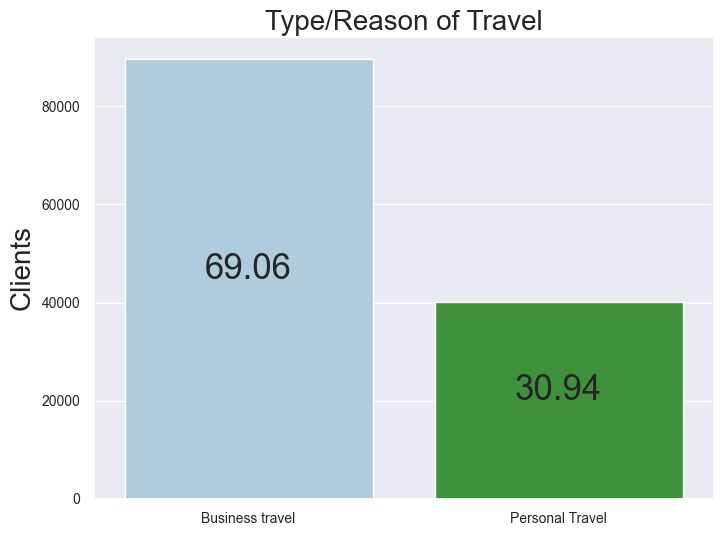

Value distribution 
neutral or dissatisfied    73452
satisfied                  56428
Name: satisfaction, dtype: int64


In [18]:
#Type of Travel
graph_hist(df, y = "Clients", 
           column = 'Type of Travel', 
           title = "Type/Reason of Travel")

#gender values
count_values(df, var)

Roughly 70% of the customer base travel for business reasons, while "only" 30% travel for personal reasons.

Assumptions:

- Business travelers may have specific service requirements to make their travel experience more conducive to work (e.g., gate location, Wi-Fi service, convenient departure/arrival times).
- Customers traveling for personal reasons may have different service requirements related to entertainment.
This airline may focus its business model on business travelers and may have special offers for business trips (I need to check the relationship between Business and Fidelity programs).
- The population is skewed towards business travelers.

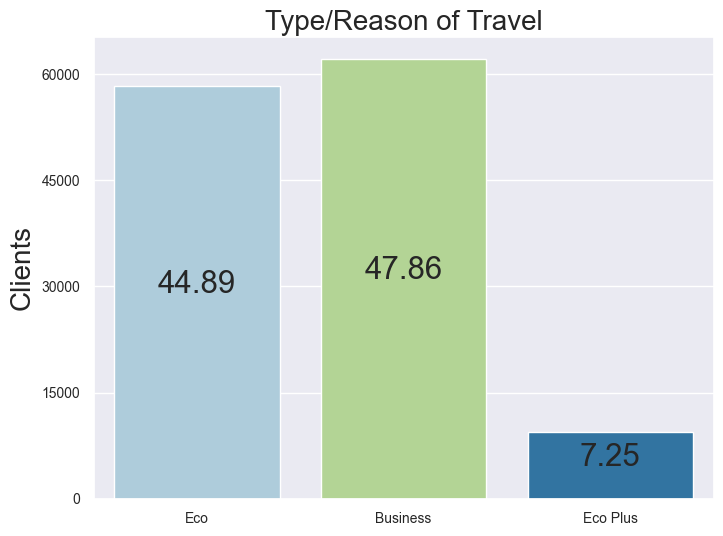

Value distribution 
neutral or dissatisfied    73452
satisfied                  56428
Name: satisfaction, dtype: int64


In [19]:
#Class
graph_hist(df, y = "Clients",
           column = 'Class', 
           title = "Type/Reason of Travel")

#gender values
count_values(df, var)

Approximately 44% of customers prefer Eco and 47% prefer Business class. Only a few customers choose Eco Plus. It is likely that the class preference is related to the price, but we don't have that data.

Assumptions:
- The quality of services may vary among classes
- Customers may choose classes based on price rather than the services offered.

Further investigation is needed to determine:
- Which services are working well
- Which services need improvement

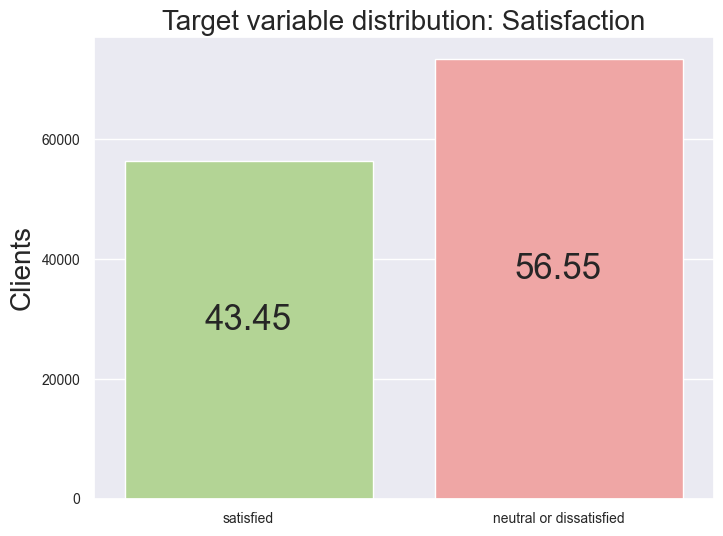

Value distribution 
neutral or dissatisfied    73452
satisfied                  56428
Name: satisfaction, dtype: int64


In [20]:
#satisfaction
graph_hist(df, y = "Clients", column = 'satisfaction', title = "Target variable distribution: Satisfaction")

#gender values
count_values(df, var)

The target variable is imbalanced. As the aim of our project is to build a model for predicting "neutral or dissatisfied" customers, we can say that our dataset is balanced. There are slightly more satisfied customers than neutral or dissatisfied customers.



Numeric variable to analyze:
- Age
- Flight distance
- Departure Delay in Minutes        
- Arrival Delay in Minutes

I'll use a boxplot as graph and then I analyze the feature with statistic metrics:
- median
- mean
- mode
- percentile distribution
- standard deviation

In [21]:
#Function for continuos numeric variable (scatter plot)
def graph_boxplot(df,y: str, column: str, title: str , figsize = [8,6]):
    
    #set graph
    plt.figure(figsize = (figsize[0], figsize[1]))
    
    #graph title
    plt.title(title, fontsize = 20, va = 'center', pad = 10)
    
    #random color
    colors = sns.color_palette("Paired", len(cat))
    random.shuffle(colors)
    
    #graph type (countplot)
    ac = sns.boxplot(data = df,
                 x = column,
                 palette = colors,
                 showmeans = True)
    
    #Y label    
    plt.ylabel('', fontsize = 20)
    
    #No x label
    plt.xlabel(y);

    #size of tick
    plt.tick_params(axis='both', which='major', labelsize=10)

    #set max 5 bin on x axis
    ac.yaxis.set_major_locator(plt.MaxNLocator(5))
    
    return plt.show()

#def interesting statistic metrics
def stats(df, column):
    
    pandas_stats = round(df[column].describe(),2)
    median = df[column].median()
    mode = df[column].mode()
    
    print(f"Median       {median}\n", f"Mode        {mode[0]}\n", pandas_stats)

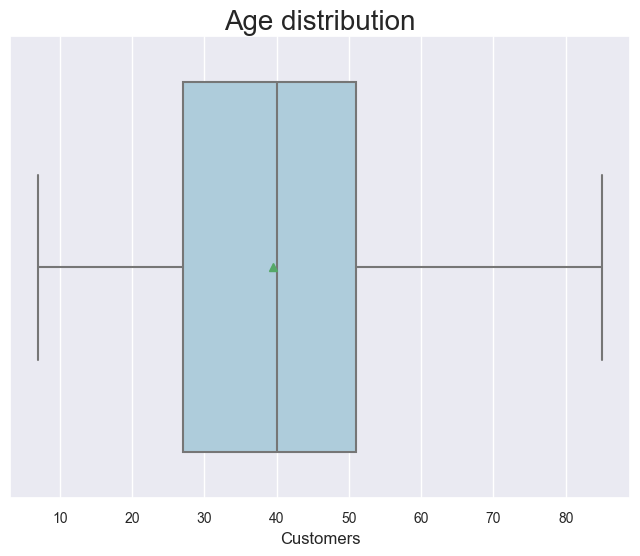

Median       40.0
 Mode        39
 count    129880.00
mean         39.43
std          15.12
min           7.00
25%          27.00
50%          40.00
75%          51.00
max          85.00
Name: Age, dtype: float64


In [22]:
#graph
graph_boxplot(df, y = 'Customers', 
              column = 'Age', 
              title = 'Age distribution')

#stats metrics
stats(df, 'Age')

The Age distribution seems consisent as we have the median, mean and the mode real close to each others. We can assume that this sample represent the population.

I can divide the population in bin and analyze how the satisfaction can change between generation. 


Futher analysis:
- Fidelity and Age
- Business trips and Age

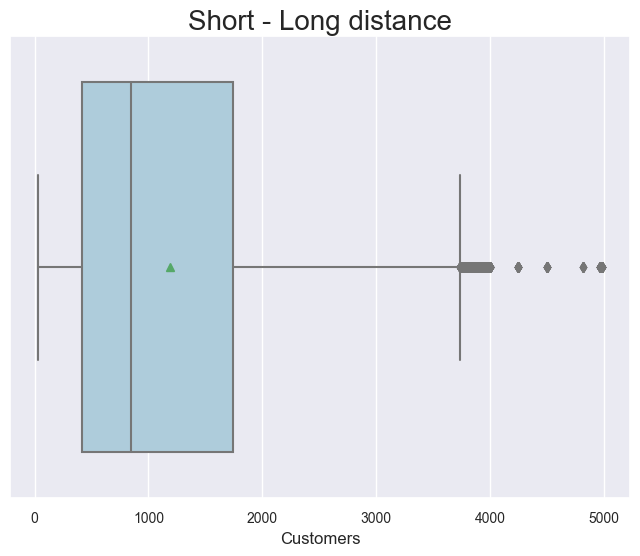

Median       844.0
 Mode        337
 count    129880.00
mean       1190.32
std         997.45
min          31.00
25%         414.00
50%         844.00
75%        1744.00
max        4983.00
Name: Flight Distance, dtype: float64


In [23]:
#Flight Distance
graph_boxplot(df, y = 'Customers',
              column = 'Flight Distance', 
              title = 'Short - Long distance')

#stats metrics
stats(df, 'Flight Distance')

Based on this category which I've found online: https://www.pointhacks.com.au/differences-short-medium-long-haul-flights/ 
Short-haul (<3 hours): approximately 2,400-2,700 km
Medium-haul (3-6 hours): approximately 4,800-8,100 km
Long-haul (6-12 hours): approximately 9,600-16,200 km
Ultra-long-haul (12+ hours): more than 16,200 km

This airline company provides short mostly short flight as the max is about 4983 km.
Based on this research

Assumptions:
- All flight are classified as short distance
- Clients above the 75th percentile can't be classified as outliers as this is a real option.

Further insights:
- Analyze the satisfaction of clients based on flight distance.
- In which flight distance does the company need to improve its services and increase overall satisfaction?"

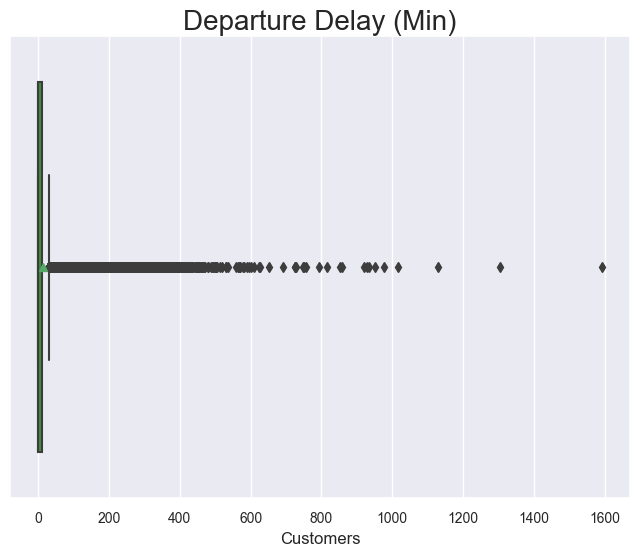

Median       0.0
 Mode        0
 count    129880.00
mean         14.71
std          38.07
min           0.00
25%           0.00
50%           0.00
75%          12.00
max        1592.00
Name: Departure Delay in Minutes, dtype: float64


In [24]:
#graph
graph_boxplot(df, y = 'Customers',
              column = 'Departure Delay in Minutes',
              title = 'Departure Delay (Min)')

#stat metrics
stats(df, 'Departure Delay in Minutes')

Departure delay in minutes.
Based these data we can see that in overal the Airline company didn't have high departure delay (median = 0). But, there are roghly 25% of clients that had a departure delay higher than 12 minutes, with some extreme case between 1000 (16 hours) - 1600 minutes (23 hours).

Assumption:
- Delay could be cause by external factors which aren't included in this dataset (i.e bad wheters, mechanichs problem etc)
- Overll delay flight average is 12 minutes (EU stats)
- After 3 hours the flight is remboursed
- Flight after 3 hours could be outliers or extreme case by external factors (i.e wheter, mechanical problem etc)

Futher steps:
- setup a threshold of 3 hours. This threshold would help to filter out extreme outliers while still preserving data that is relevant to the analysis (exceptional delay)
- Reduce bias from extreme delay.

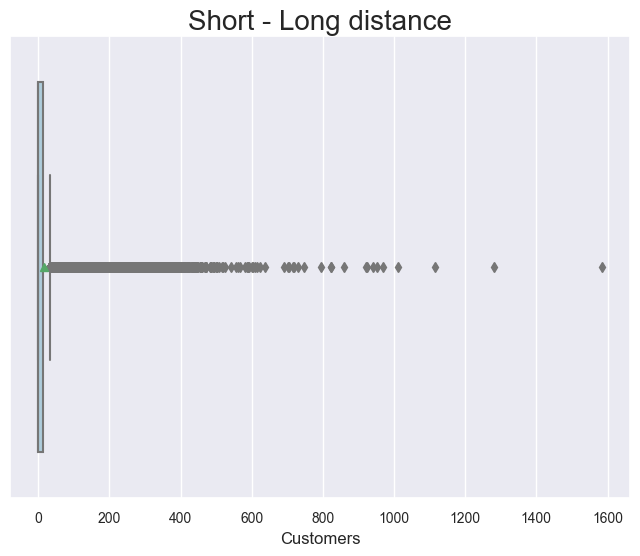

Median       0.0
 Mode        0
 count    129880.00
mean         15.05
std          38.42
min           0.00
25%           0.00
50%           0.00
75%          13.00
max        1584.00
Name: Arrival Delay in Minutes, dtype: float64


In [25]:
#graph
graph_boxplot(df, y = 'Customers', 
              column = 'Arrival Delay in Minutes', 
              title = 'Short - Long distance')

#stat metrics
stats(df, 'Arrival Delay in Minutes')

Arrival delay in minutes. Based these data we can see that in overal the Airline company didn't have high departure delay (median = 0). But, there are roghly 25% of clients that had a departure delay higher than 13 minutes, with some extreme case between 1000 (16 hours) - 1600 minutes (23 hours).

Assumption:
- Delay could be cause by external factors which aren't included in this dataset (i.e - - bad wheters, mechanichs problem etc)
- Overll delay flight average is 12 minutes (EU stats)
- After 3 hours the flight is remboursed
- Flight after 3 hours could be outliers or extreme case by external factors (i.e wheter, mechanical problem etc)

Futher steps:
- setup a threshold of 3 hours. This threshold would help to filter out extreme outliers while still preserving data that is relevant to the analysis (exceptional delay)
- Reduce bias from extreme delay.

Ordinal Categoric Features
- Departure/Arrival time convenient  
- Ease of Online booking             
- Gate location                      
- Food and drink                     
- Online boarding                    
- Seat comfort                       
- Inflight entertainment             
- On-board service                   
- Leg room service                    
- Baggage handling                    
- Checkin service                    
- Inflight service                   
- Cleanliness                        
 
These features explain the level of services offered by the Airline company. The client was invitited to express a vote from 0 to 5 to the related service


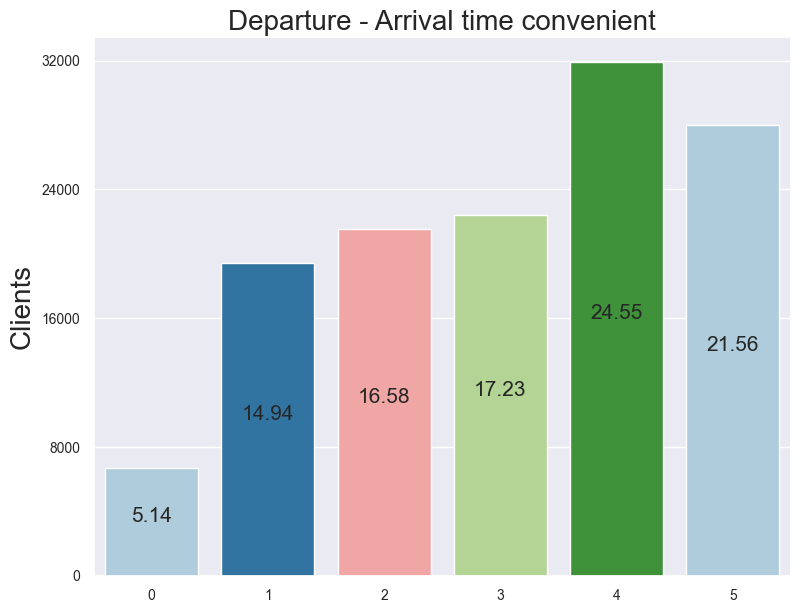

Value distribution 
4    31880
5    27998
3    22378
2    21534
1    19409
0     6681
Name: Departure/Arrival time convenient, dtype: int64


In [26]:
#Departure time convenient
graph_hist(df, 
           y = "Clients", 
           column = "Departure/Arrival time convenient", 
           title = "Departure - Arrival time convenient", 
           figsize = [9,7])

#stat metrics
count_values(df, "Departure/Arrival time convenient")

Key findings in overall:
- 40% of our sample indicate that the airline company have a good "Departure - Arrival time convenient".
- 20% indicate a low time convenient 
- between 30% client think that is good but not perfect.

Futher insight:
- We need to investigate this based on Business Travel and Personal Travel. The time preference could change

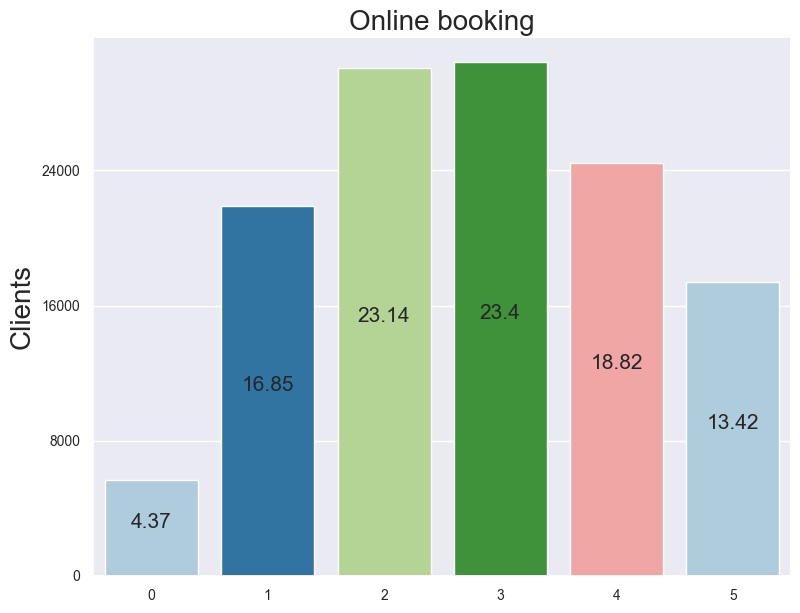

Value distribution 
3    30393
2    30051
4    24444
1    21886
5    17424
0     5682
Name: Ease of Online booking, dtype: int64


In [27]:
#hist graph and standard statistic metrics
graph_hist(df, y = "Clients", 
           column = "Ease of Online booking", 
           title = "Online booking", 
           figsize = [9,7])

#stat metrics
count_values(df, "Ease of Online booking")

Futher investigation:
- I could focus my research on how the airline company can attract "Disloyal Customer". **What are the service that they don't like?
- Population is skewed to Business Travelers.
- Which services are working well
- Which services need improvement
- I can divide the population in bin and analyze how the satisfaction can change between generation. 
- <18
- 19-25 (students)
- 25-35 (workers)
- 35-45 (workers)
- 45-55 (workers)
- 55-65 (old people)
- +65

Futher analysis:
- Fidelity and Age
- Business trips and Age

Further insights:
Classify all flights into: short, medium, and long distance.
Analyze the satisfaction of clients based on flight distance.
In which flight distance does the company need to improve its services and increase overall satisfaction?"

Futher steps:
setup a threshold of 3 hours. This threshold would help to filter out extreme outliers while still preserving data that is relevant to the analysis (exceptional delay)
Reduce bias from extreme delay.

OUTLIERS 
Check if Delay depends on flight distance. In case this are unreal data, set a threeshold for departure time

In [28]:
"""
Build A function for compute pearson correlation.
Understand if two 2 varriables are correlated.
The indicators is a range between -1 and +1 where a Zero value means no correlation.
+1 or -1 indicates a strong positive or negative correlation
"""

from scipy.stats import pearsonr
#Function

def correlation(df, var1: str, var2: str):
    
    #compute pearson correlation and p_value
    corr, p_value = pearsonr(df[var1], df[var2])
    print(f'Correlation {round(corr,3)}, P-Value {round(p_value,3)}')
    
#Analyze groupby
def groupby(df, cat_var: str, num_var: str):
    
    stats = df.groupby(cat_var)[num_var].describe()
    
    return stats

HANDLE OUTLIERS:
Before to change any data, I want to investigate if extreme flight delay depends on the flight distance.
Hypotesis: 
- H0 no correlation between flight distance and departure Delay minutes
- H1 Departure Delay in Minutes depends on Flight distance
- alpha (accepted error) = 0.05

(Check p value)

See how Departure Delay in minutes impact client satisfaction

In [29]:
#Analyze correlationcorr = correlation(df, 'Flight Distance', 'Departure Delay in Minutes')

P-value higher than 0.05 (alpha), we can't refuse H0.
We can assume a No correlation between flight Distance & Departure.


As there is not correlation between Flight Distance and Delay departure, I will handle outliers in the following way:
- Set a threeshold of 3 hours (Standard "extreme" flight delay" *)
- Change all value above 3 (180 minutes) hours with this threeshold

*The threshold comes from a research regardin standard flight delay. It's highly improbable having delay of that ours as the flight would be postponed to the next day or changed it. An average of accept deleay is 3 hours

In [30]:
#analyze satisfaction & departure
cat_var = 'satisfaction'
num_var = 'Departure Delay in Minutes'

stats = groupby(df, cat_var, num_var)

print(stats)

                           count       mean        std  min  25%  50%   75%  \
satisfaction                                                                  
neutral or dissatisfied  73452.0  16.406837  40.182914  0.0  0.0  0.0  15.0   
satisfied                56428.0  12.509782  35.010480  0.0  0.0  0.0   9.0   

                            max  
satisfaction                     
neutral or dissatisfied  1592.0  
satisfied                1305.0  


Satisfied customers have an average delay of 12 minutes, while those who are neutral or dissatisfied have an average delay of 16 minutes. The standard deviation also has a slight difference, but the maximum delay is quite similar. Based on these three statistical metrics, we can assume that extremely high delays are outliers that do not belong to any specific group (such as dissatisfied customers). To improve our future model, we can set a threshold of 3 hours as an acceptable delay for flights, based on "Winsorizing" technique. The aim is so decrease the power of outliers but keeping them relevant for our analyzes as flight with high delay could decrease the satisfaction of clients

In [31]:
#change value
df.loc[df['Departure Delay in Minutes'] > 180, 'Departure Delay in Minutes'] = 180

print(df['Departure Delay in Minutes'].describe())

count    129880.000000
mean         13.847197
std          30.865197
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max         180.000000
Name: Departure Delay in Minutes, dtype: float64


In [32]:
#Remove Arrival Delay. They are really similar 
df = df.drop('Arrival Delay in Minutes', axis = 1)

EDA part 2.
Answer these following question:
- Who are the most satisfay clients?
    - Business or personal travel?
    - Fidelity or without fidelity card?
    - Which flight class?
- Which services need to be imrpoved ?
    - For business trip / personal trip
    - For flight class
    - Flight distance

In [33]:
#compute percentages
def groupby_perc(df, var: str, target: str):
    
    value_counts = df.groupby(var)[target].value_counts()
    calc = value_counts / df.groupby(var).size() * 100
    
    #create list
    percentages = []
    
    for i in calc:
        percentages.append(i)
        
    return percentages

#Add % in the graph
def perc_hue(ax, feature, Number_of_categories, hue_categories):
    
    #get heigh of bar
    a = [p.get_height() for p in ax.patches]
    #get bar
    patch = [p for p in ax.patches]
    #compute %. 2 loop needed. Iteract on n° of categories
    for i in range(Number_of_categories):
        #total of each categories
        total = feature.value_counts().values[i]
        #2° loop
        for j in range(hue_categories):
            #compute %
            percentage = str(round(100 * a[(j*Number_of_categories + i)]/total,2))
            #get coordinate (x,y)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() / 2
            #annotate percentage
            ax.annotate(percentage, (x, y), size = 20, ha = 'center')
        

#graph hist with hue
def graph_hist_hue(df,y: str, column: str, hue: str, title: str, figsize = [8,6]):
      
    #set graph
    plt.figure(figsize = (figsize[0], figsize[1]))
    
    #graph title
    plt.title(title, fontsize = 20, va = 'center', pad = 10)
    
    #random color
    colors = sns.color_palette("Paired", len(cat))
    random.shuffle(colors)
    
    #graph type (countplot)
    ac = sns.countplot(data = df,
                 x = column,
                 hue = hue,
                 palette = colors)

    #change y label
    plt.ylabel(y, fontsize = 20)
    
    #No x label
    plt.xlabel('');

    #size of tick
    plt.tick_params(axis='both', which='major', labelsize=10)

    #set max 5 bin on x axis
    ac.yaxis.set_major_locator(plt.MaxNLocator(5))
    
    n_cat = len(df[column].value_counts())
    n_hue = len(df[hue].value_counts())
    
    #annotate %
    perc_hue(ac, df[column], n_cat, n_hue)
    
    #return graph
    return plt.show() 
        

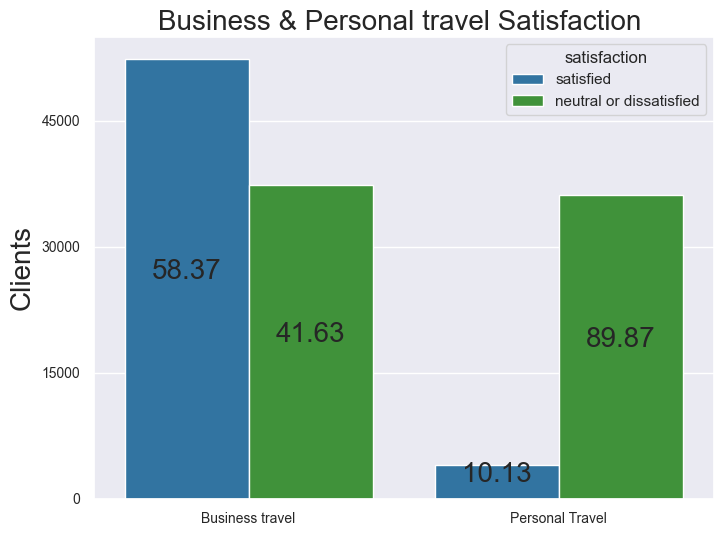

In [34]:
#Analyze Business & Personal travel satisfaction
graph_hist_hue(df, y = 'Clients', 
               column = 'Type of Travel', 
               hue = 'satisfaction', 
               title = 'Business & Personal travel Satisfaction ')

Findings:
- Business travelers are more satisfy than Personaò Travel. 58% against 10%
- Personal travel category has a huge percentage of people neutral or dissatisfied. 
- This airline company business fits more to business than personal travelers

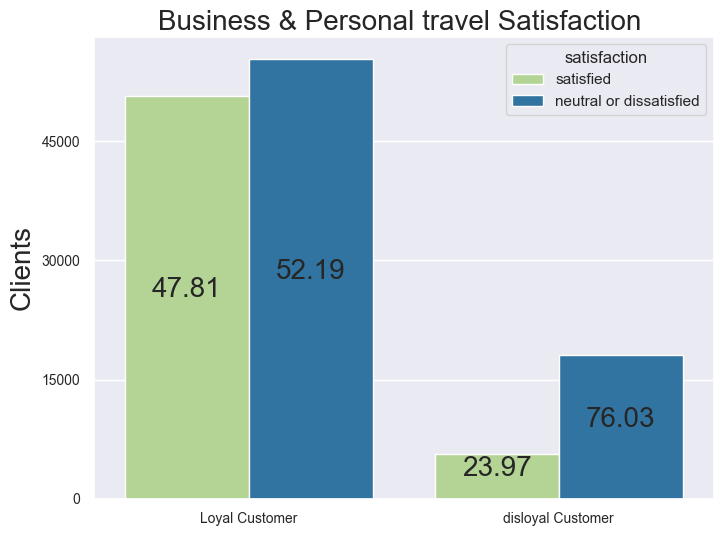

In [35]:
#Fidelity or without fidelity card
graph_hist_hue(df, y = 'Clients', 
               column = 'Customer Type', 
               hue = 'satisfaction', 
               title = 'Business & Personal travel Satisfaction ')

Key findings:
- Low representation for disloyal customer. This could be a problem that can occur when collecting data. Disloyal customer weren't interested in filling a questionar.
- Loyal customers are more satisfied about the company airline than disployal customer
- Company need to improve services for Loyal Customer as half of them declare a neutral or dissatisfied status

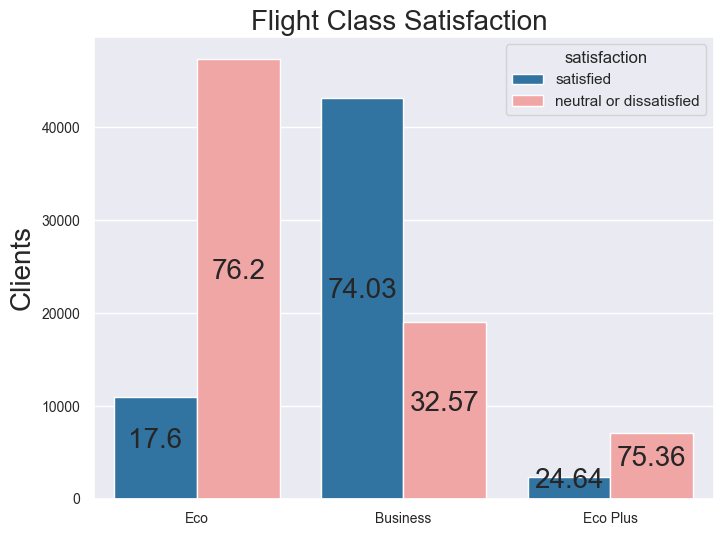

In [36]:
#Fidelity or without fidelity card
graph_hist_hue(df, y = 'Clients', 
               column = 'Class', 
               hue = 'satisfaction', 
               title = 'Flight Class Satisfaction ')

Key findings:
- Business class have the highest satisfaction rate. It means that clients that take business class are on average satisfied
- Eco & EcoPlus have the highest neutral or dissatisfied rate. People that use this 2 classes aren't satisfied
- Eco is well represented and we can see a remarkable difference between satisfied and not satisfied.
- Same as Eco Plus but there are less data available. EcoPlus isn't the main option for customers

In [37]:
""""
Small function for computing the overal services satisfaction depending on:
- Type of business
- Fidelity
- Class
"""

def overal_mean(df):
    
    #get index
    index = df.index
    
    #loop for computing overal mean
    for x in index:
        #compute
        mean = round(df.loc[x].mean(),2)
        #add mean
        
        print(f'The overal service satisfaction mean for the type {x} is {mean}')
    
    return df


In [38]:
#Business & Personal travel services comparison
services = ['Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location',
            'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment',
            'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service',
            'Inflight service', 'Cleanliness', 'Inflight wifi service']

type_mean = round(df.groupby('Type of Travel')[services].mean(), 2)

overal_mean(type_mean)

The overal service satisfaction mean for the type Business travel is 3.3
The overal service satisfaction mean for the type Personal Travel is 3.12


,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Inflight wifi service
Type of Travel,,,,,,,,,,,,,,
Business travel,2.79,2.88,3.00,3.27,3.46,3.55,3.49,3.43,3.47,3.66,3.29,3.66,3.36,2.82
Personal Travel,3.64,2.48,2.92,3.07,2.80,3.19,3.05,3.27,3.08,3.57,3.34,3.60,3.12,2.52


Quantify the overal service satisfaction:
- The company services are rate quite good for both type of travellers
- Services are considered better from Business perspective
- Departure/Arrival time convenient. This is way better for Personal travel than business

In [39]:
#Customer Type difference
customer_mean = round(df.groupby('Customer Type')[services].mean(), 2)

overal_mean(customer_mean)

The overal service satisfaction mean for the type Loyal Customer is 3.28
The overal service satisfaction mean for the type disloyal Customer is 3.05


,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Inflight wifi service
Customer Type,,,,,,,,,,,,,,
Loyal Customer,3.21,2.77,2.97,3.24,3.37,3.54,3.43,3.42,3.38,3.62,3.32,3.63,3.34,2.73
disloyal Customer,2.39,2.70,2.99,3.04,2.71,3.01,3.06,3.24,3.22,3.69,3.22,3.70,3.06,2.71


Quantitive analysis:
- Loyal Customers overal satisfaction is about 3.33/5. Really good
- Disloyal customer, the quality of service is good as well with 3.08/5.
- Main difference is between Departure/arrival time convenient where Loyal Customers consider really good in respect of disloyal customer. This service could be the main difference between Loyal Customer and Disolyal Customer.

In [40]:
#Class difference
class_mean = round(df.groupby('Class')[services].mean(), 2)

overal_mean(class_mean)

The overal service satisfaction mean for the type Business is 3.43
The overal service satisfaction mean for the type Eco is 3.07
The overal service satisfaction mean for the type Eco Plus is 3.06


,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Inflight wifi service
Class,,,,,,,,,,,,,,
Business,2.91,2.92,2.99,3.33,3.72,3.76,3.64,3.68,3.65,3.84,3.52,3.85,3.48,2.78
Eco,3.19,2.60,2.97,3.09,2.81,3.14,3.10,3.12,3.08,3.45,3.12,3.47,3.10,2.67
Eco Plus,3.21,2.66,2.97,3.11,2.89,3.17,3.12,3.04,3.06,3.35,3.01,3.38,3.12,2.76


Quantitative analysis:
- Business class is rated really good with a 3.48/5.
- Services on Eco and Eco plus should be improved eventhough the overal grade is 3/5


Characteristics of Unsatisfied customers:
- Personal Travelers
- Customers that book Eco and Eco Plus flight class
- No-loyal customers 

What We Know About Our Dataset:
- This is an airline company that focuses its services on business travelers.
- Other travelers choose this company specifically for its convenient departure and arrival times, which is suitable for their purposes.
- Overall, personal travelers are not satisfied with their flight experience, even though they rate the overall service at about 3 out of 5.

We'll focus our machine learning on understanding the key features that influence overall customer satisfaction and their impact.

## Feature Engineering.

Prepare dataset before build ML model

Steps of Preprocessing
- Feature engineering part 1 (categorical variable)
    - One hot encoding is a technique used to transform categorical variables into a set of binary features. This involves creating n binary variables, where n is the number of categories in the categorical variable, and assigning a value of 1 to the variable that corresponds to the original category, and 0 to all other variables. This technique allows us to convert categorical data into a numerical format that can be interpreted by machine learning algorithms.
    - Target Variable changed to numeric value
        - 0 Unsatisfied
        - 1 Satisfied 
    - Ordinal categoric variables have numeric format
- Split dataset in training and test set:
    - Check if the target variable is balanced (50% satisfied and 50% unsatisfied)
    
- Feature engineering part 2 (continuous numeric variable)
    - The StandardScaler is a preprocessing technique used to standardize the data in a machine learning model. Standardization is used to remove the influence of different units or scales in the data (e.g., years, minutes, kg, etc.) by scaling the data so that it has zero mean and unit variance. 
    - The StandardScaler works by calculating the mean and standard deviation of each feature in the data, and then scaling each feature so that it has a mean of 0 and standard deviation of 1.  While ensemble algorithms like Random Forest and AdaBoost are relatively robust to differences in feature scales, scaling the data can still potentially improve the performance of these algorithms.
    - Fit the Standard Scaler to Trainset
    - Transform Trainset
    - Transfor Testset with fit on trainset (ensure consistency in scaling data)
    
- Feature selection
    - Multicollinearity analysis involves analyzing the linear relationship and correlation between continuous variables. In addition to the continuous features, I will also include ordinal features that can be treated as continuous, as well as the target variable, which can also be treated as a continuous variable, to analyze their relationships with the numeric features. 
    - Feature selection related to numeric and is an important step in feature selection that helps to understand whether variables (X) have a strong linear relationship or correlation. A standard threshold for correlation is 0.7. I will keep the variable that has a stronger correlation with the target variable, and I will drop the other variable from the machine learning model.
    - By removing variables with high collinearity, we can improve the performance and interpretability of the model. This is because variables with high collinearity can lead to unstable model coefficients and make it difficult to understand the individual effects of each variable on the target variable.
    - Chi square analsyis. Used for feature selection regarding categorical variable. It measures the significance between  two categorical variables. The aim is to include in our ML model categorical feature that has strong significance with our target variable.
    - Select high correlated feature for the ML model based on the informations
 

Feature engineering part 1 (categorical variable)

In [41]:
#get cat variable
cat = [var for var in df if df[var].dtype == 'O']

#remove satisfaction. We don't need Y target
cat.remove('satisfaction')

#Encode categorical variable. Use one hot encoding
df = pd.get_dummies(
    df,
    columns = cat)

In [42]:
#encode target variable
from sklearn.preprocessing import LabelEncoder

#Label encoder. A binary featuers will be encoded as 0 and 1
encoder = LabelEncoder()
df['satisfaction'] = encoder.fit_transform(df['satisfaction'])

In [43]:
#split into train and test set
from sklearn.model_selection import train_test_split

#divide predictors and target variable
X = df.drop(columns = 'satisfaction')
y = df['satisfaction']

#PARTITIONING
#data are shuffled and then splitted. To reproduce alwayes the same results we set up a random seed of 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [44]:
#check dataset balance
print('Train frequency', y_train.value_counts()/len(y_train))
print('Test frequency', y_test.value_counts()/len(y_test))

Train frequency 0    0.564917
1    0.435083
Name: satisfaction, dtype: float64
Test frequency 0    0.566985
1    0.433015
Name: satisfaction, dtype: float64


Both dataset are balanced

Feature engineering part 2 (continuous numeric variable)

In [45]:
from sklearn.preprocessing import StandardScaler

#continuous numeric variable
num = ['Age', 'Flight Distance', 'Departure Delay in Minutes']

#Standard scaler as described previously
scaler = StandardScaler()

#Fit on trainset and scale it
X_train[num] = scaler.fit_transform(X_train[num])

#Scale test data based on train fitting
X_test[num] = scaler.transform(X_test[num])

## Feature Selection




Part 1: Multicollinearity. Analyze if the X variables are highly correlated. This can lead to a decrease in our model's performance since the model may not be able to distinguish between the two variables, resulting in inaccurate coefficient predictions

<AxesSubplot: title={'center': 'Multicolinearity Analysis'}>

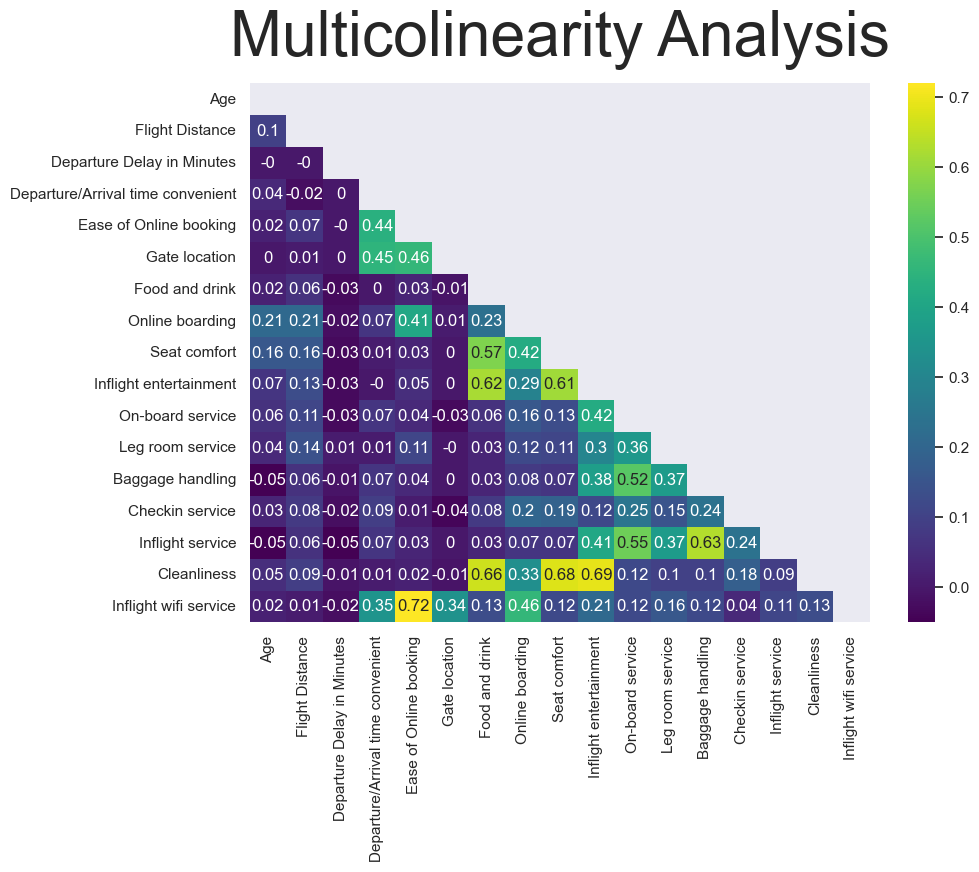

In [46]:
#change X train format to DataFrame
train_df = pd.DataFrame(X_train, columns=X.columns)

#comput of numeric variable and ordinal categorical variable Pearson Correlation
corr = round(train_df[num + services].corr(), 2)

#create a list for removing features

#plot it
plt.figure(figsize = (10,7))
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.title('Multicolinearity Analysis', fontsize = 45, pad = 20)
sns.heatmap(corr, 
           annot = True,
           cmap = 'viridis',
           mask = mask)

Threehsold for multicolinearity 0.8: no features above the threehsold


Below threeshold but they are really high:
- Inflight wifi services - Ease of online booking
- Food & Drink and Cleanliness: High correlation 0.66
- Cleaninless and Seat comfort: 0.68
- Inflight Entertaiment: 0.69



Feature Selection.

Part 2: Analyze correlation with target variable: satisfaction.
Feature that I'll remove. Threehsold: below 0.20

<AxesSubplot: title={'center': 'Target correlation'}>

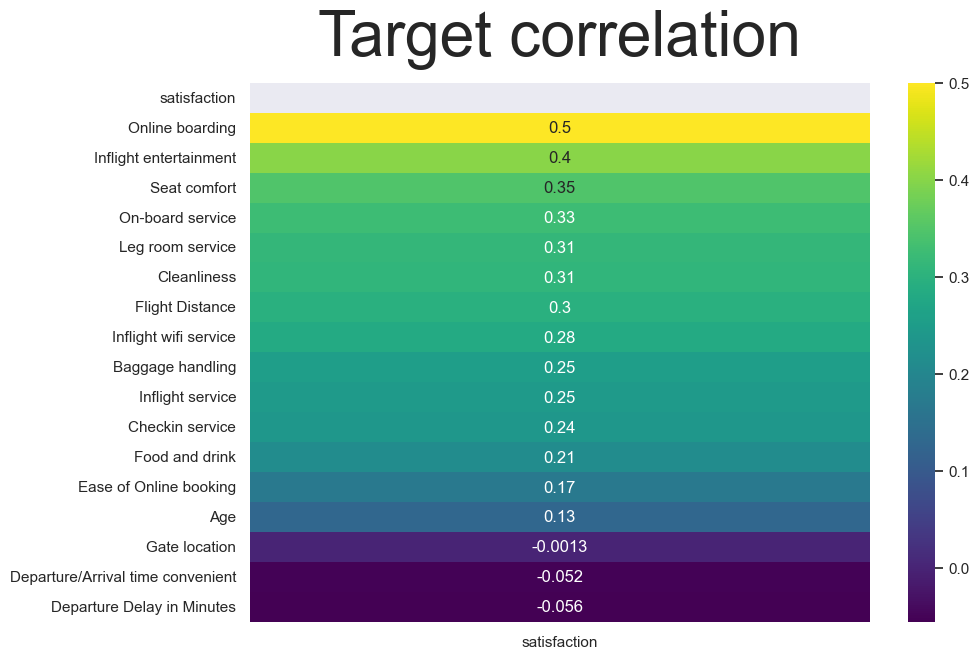

In [47]:
#Create a new train dataset and add Target feature (y)
train_df['satisfaction'] = pd.Series(y_train)

#list of numeric features, services (categorical variable) and y target
num_cols = num + services + ['satisfaction']

#compute pearson correlation
corr = train_df[num_cols].corr()[['satisfaction']].sort_values(by = 
                                                               'satisfaction', 
                                                               ascending = False)

#plot it
plt.figure(figsize = (10,7))
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.title('Target correlation', fontsize = 45, pad = 20)
sns.heatmap(corr, 
           annot = True,
           cmap = 'viridis',
           mask = mask)

Removing variable

In [48]:
#set threshold
pos_threshold = 0.20
neg_threshold = -0.20

#create new list for keeping on track variables that we need to remove
rem_var = []

#script for removing variable
for var, coef in zip(corr.index, corr['satisfaction']):
  
  #condition
  if coef < pos_threshold and coef > neg_threshold:
    #add variable to the list
    rem_var.append(str(var))

    print(f'var to remove {var} because has a coef between = {round(coef,2)}')

var to remove Ease of Online booking because has a coef between = 0.17
var to remove Age because has a coef between = 0.13
var to remove Gate location because has a coef between = -0.0
var to remove Departure/Arrival time convenient because has a coef between = -0.05
var to remove Departure Delay in Minutes because has a coef between = -0.06


Features that have corr coefficent lower than 0.10 or bigger than -0.10:
- Departure/Arrival time convenient
- Departure Delay in Minutes
- Gate Location
- Age
- Ease of Online booking

Feature Selection part 2:
Chi-square test. Check the relationship between our Y and nominal variables X

In [49]:
from scipy.stats import chi2_contingency

#categories (dummy)
cat = ['Gender_Female',
                 'Gender_Male',
                 'Customer Type_Loyal Customer',
                 'Customer Type_disloyal Customer',
                 'Type of Travel_Business travel',
                 'Type of Travel_Personal Travel',
                 'Class_Business',
                 'Class_Eco',
                 'Class_Eco Plus']

#set threshold
chi2_threshold = 1000

#Compute Chi2
for col in cat:
    #contingency table
    chi2_table = pd.crosstab(train_df[col], train_df['satisfaction'])
    #compute chi2
    chi2, p, dof, expected = chi2_contingency(chi2_table)
    #remove variable
    print(f"Chi-square test for {col} and Satisfaction: \n p-value = {round(p,2)}, \n chi-square {round(chi2,2)}")

    #keep track of unrelated features
    if chi2 < chi2_threshold:
      rem_var.append(str(col))

Chi-square test for Gender_Female and Satisfaction: 
 p-value = 0.0, 
 chi-square 12.31
Chi-square test for Gender_Male and Satisfaction: 
 p-value = 0.0, 
 chi-square 12.31
Chi-square test for Customer Type_Loyal Customer and Satisfaction: 
 p-value = 0.0, 
 chi-square 3089.68
Chi-square test for Customer Type_disloyal Customer and Satisfaction: 
 p-value = 0.0, 
 chi-square 3089.68
Chi-square test for Type of Travel_Business travel and Satisfaction: 
 p-value = 0.0, 
 chi-square 18460.6
Chi-square test for Type of Travel_Personal Travel and Satisfaction: 
 p-value = 0.0, 
 chi-square 18460.6
Chi-square test for Class_Business and Satisfaction: 
 p-value = 0.0, 
 chi-square 22940.78
Chi-square test for Class_Eco and Satisfaction: 
 p-value = 0.0, 
 chi-square 18509.95
Chi-square test for Class_Eco Plus and Satisfaction: 
 p-value = 0.0, 
 chi-square 948.86


Feature Selection based on Chi-square. Removing:
- Gender: Male and Female
- Flight class: Ecoplus

Overal feature selection which I removed:
Pearson coef:
- Easy of Online Booing 
- Departure/Arrival time convenient 
- Departure Delay in Minutes 
- Gate location 
- Age 
Chi2:
- Gender
- Eco_plus


#Machine Learning: Introduction
This is a classification problem. Our target is to predict satisfaction of clients, which is a binary class: Satisfied or not satisfied.
Based on that the model which I've selected are:
- Logistic regression (low complexity)
- Randomforest (ensemble model)
- Adaboost (ensemble model)

First part: use all variables

Second part: use variables from feature selection


## Machine Learning: Evaluation Metrics definition

For a classification problem, we can measure the efficacy of an ML model using the following metrics:

- Accuracy: a standard metric for classification problems that represents the ratio of correctly predicted entities to the total number of entities. It is a good metric if the dataset is balanced. However, if the dataset is imbalanced, accuracy alone won't provide a complete picture of how well the ML model predicts each class label.
- Precision: a metric that evaluates the proportion of true positive labels among all predicted positive labels (true positive / (true positive + false positive)).
- Recall (Sensitivity): a metric that explains the proportion of actual positive cases that were correctly predicted by the model (true positive / (true positive + false negative)). The importance of this metric depends on the project and goals. For example, in healthcare, it may be more important to reduce false negatives (i.e., people who are sick but are labeled as healthy by the model) than false positives.

By considering these metrics, we can evaluate the performance of an ML model and make informed decisions about its suitability for a particular task.


For our case where we aim to predict client satisfaction and the dataset is well balanced, we can prioritize our model evaluation using accuracy as a metric.

However, if the purpose is to predict satisfied clients to offer them special deals, it is crucial to reduce false negatives (i.e., clients who are classified as unsatisfied but are actually satisfied). This is important because it could lead to a loss of profits and loyal customers who may accept offers or join a loyalty program. Therefore, in this scenario, recall (sensitivity) would be a more relevant metric to evaluate the model's performance.


# Machine learning part 1: ALL FEATURES





## Logistic regression

Logistic regression is a supervised model for classification problems. 
The logic behind the logistic regression is to predict the probability of a binary target variable given certain data & feature. In this case, the aim is to predict the probability  or the likelihood that a client will be satisfied or not (y) about the airline company which it could depends on on several features (X) such as age, type of travel, services rating etc.

In [50]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

#set kfold. 10 blocks
kfold = model_selection.KFold(n_splits=5)

#model
model = LogisticRegression()

#accurancy score
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)

print('Logistic Regression', results.mean())

Logistic Regression 0.8745435514465427


## RandomForest

RandomForest is a superived "ensembled" model for both classifiction and regression problems. Ensemble because it's an ensemble of many TreeClassifier. Insteand that run an single Tree, RandomForest run k TreeClassifier and adjust they by useing the average which improves the predictive accuracy and controls the over-fitting. A weak ML model became a strong one. Each tree is indipented. 

The overal score is an average of all sub-tree 

In [51]:
from sklearn.ensemble import RandomForestClassifier

#model
model = RandomForestClassifier()

#accurancy score
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)

print('Random Forest', results.mean())

Random Forest 0.9628448264369196


## Adaboost

Adaboost is a superived "ensembled" model for both classifiction and regression problems. Ensemble because it's an ensemble of many TreeClassifier. Insteand that run an single Tree which are build one by one. Adaboost run k TreeClassifier (like RandomForest) and adjust overal performace by adjusiting weights of incorrectly classified of the previous tree tances focusing more on difficult cases in the next tree. 

Tree are connected one by one, like chain. The aim is that each tree aims to improve the accurancy of the previous tree.

In [52]:
from sklearn.ensemble import AdaBoostClassifier

#model
model = AdaBoostClassifier()

#accurancy score
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)

print('AdaBoost', results.mean())

AdaBoost 0.926855577088765


## Overal model evaluation

Based on the initial model evaluation, the following observations can be made:

- RandomForest & Adaboost are the best ML model for this classification problem.
- The accuracy levels are of 0.96 and 0.92 indicates that they are both good predictors.
 
It is worth noting that this is a simple model without any tuning or feature selection.




## Machine Learning: Tuning hyperparameters

Tuning HyperParameters: Hyperparemters are parameters that aren't trainied by the model itself but are hardcoded parameters chosen by the datascientist. As there could be many possibility, tuning hyperparameters it's an critical datascience project to optimize our ML model. I'll use the GridSearch methods. 

This is how it works:
K-Crossfolder validation: run the ML model k times, depending on how we want to split the dataset
Run several hyperparemters combinations
Choose the best hyperparameters based on the overal score (accurancy in our case).

### Adaboost

Hyperparameters:
- n_estimators = number of weak estimators (how many trees). The larger the better, but also the longer it will take to compute. In addition, note that results will stop getting significantly better beyond a critical number of trees.
- learning_rate: contribution of each weak learner. Decreasing this value could help to limit the overfitting

In [53]:
from sklearn.model_selection import RandomizedSearchCV

#Model
model = AdaBoostClassifier()

#Define hyperparameters
param_grid = {'n_estimators': [50, 100, 200], 
              'learning_rate': [0.1, 0.5, 1.0], 
              }

#GridCross validation
grid_search = RandomizedSearchCV(model, param_grid, cv=kfold)
grid_search.fit(X_train, y_train)

#check results
print(grid_search.best_params_)

#check parameters on test set
best_ada_boost = grid_search.best_estimator_
val_acc = best_ada_boost.score(X_test, y_test)


{'n_estimators': 200, 'learning_rate': 1.0}


In [54]:
print('Validation accuracy Adaboost:', round(val_acc, 4))

Validation accuracy Adaboost: 0.9295


### Random Forest

Hyperparameters:
- n_estimators defines the number of trees to be used in the model 
- max_features limits a count to select the maximum features in each tree
- max_depth determines the maximum number of splits each tree can take. If the max_depth is too low, the model will be trained less and have a high bias, leading the model to underfit. In the same way, if the max_depth is high, the model learns too much and leads to high variance, leading the model to overfit
- max_leaf_nodes: set up how divisions of nodes should be done is specified by max_lead_nodes. max_leaf_nodes restricts the growth of each tree. 

In [55]:
#Model
model = RandomForestClassifier()

#Define hyperparameters
param_grid = [{'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}]

#GridCross validation
grid_search = RandomizedSearchCV(model, param_grid, cv=kfold)
grid_search.fit(X_train, y_train)

#check results
print(grid_search.best_params_)

#check parameters on test set
best_log_boost = grid_search.best_estimator_
val_acc = best_log_boost.score(X_test, y_test)

{'n_estimators': 150, 'max_leaf_nodes': 9, 'max_features': 'sqrt', 'max_depth': 3}


In [56]:
print('Validation accuracy RandomForest', round(val_acc, 4))

Validation accuracy RandomForest 0.8867


## Overal model valuation

After tuning the hyperparameters and testing the ML models on a test dataset, the best performing model was found to be ADAboost with a validation accuracy of 0.9295. On the other hand, Random Forest underperformed on the test set with an accuracy of 0.8949, compared to 0.96 on the training set, indicating overfitting. 

Therefore, the best model chosen is Adaboost.

# Machine learning part 2: Selected Features 

Next, we will proceed with the second approach, where we will only select variables based on the feature selection performed in the last part of the exploratory data analysis (EDA).

In [57]:
#create new train e test dataset
X_train_2, X_test_2 = X_train, X_test

#remove columns
X_train_2 = X_train_2.drop(columns = rem_var)
X_test_2 = X_test_2.drop(columns = rem_var)

#check dataset
X_train_2.head(3)

,Flight Distance,Inflight wifi service,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco
client_id,,,,,,,,,,,,,,,,,,
93048,-0.875720,2,5,4,5,5,2,5,3,1,1,5,1,0,0,1,0,1
16904,-0.445725,2,4,1,4,4,4,5,4,3,4,4,1,0,0,1,0,1
51615,-0.822597,3,3,4,3,3,4,5,1,1,5,3,0,1,1,0,0,1


## Logistic regression

In [58]:
#model
model = LogisticRegression()

#accurancy score
results = model_selection.cross_val_score(model, X_train_2, y_train, cv=kfold)

print('Logistic Regression', results.mean())

Logistic Regression 0.8717497759917933


## RandomForest

In [59]:
#model
model = RandomForestClassifier()

#accurancy score
results = model_selection.cross_val_score(model, X_train_2, y_train, cv=kfold)

print('Random Forest', results.mean())

Random Forest 0.9594680798013858


## Adaboost

In [60]:
#model
model = AdaBoostClassifier()

#accurancy score
results = model_selection.cross_val_score(model, X_train_2, y_train, cv=kfold)

print('AdaBoost', results.mean())

AdaBoost 0.9254696847146644


## Overal model Evaluation


After the a spotcheck, the best performing model is found to be RandomForest with a validation accuracy of 0.9592 and Adaboost with 0.9254.

Therefore, I'll continue the hyperparameters tunning and final test on test dataset in the next part

## Machine Learning: Tuning hyperparameters

Tuning HyperParameters: 
Hyperparemters are parameters that aren't trainied by the model itself but are hardcoded parameters chosen by the datascientist. As there could be many possibility, tuning hyperparameters it's an critical datascience project to optimize our ML model.
I'll use the  RandomizedSearchCV methods. 
RandomizedSearch CV is a hyperparameter tuning technique that randomly selects a subset of hyperparameters from a range of values to optimize the performance of a model, while GridSearch CV exhaustively searches over all possible combinations of hyperparameters but can be computationally expensive.

This is how Randomized Search CV works:
- K-fold cross-validation: split the dataset into k folds and run the ML model k times, with each fold serving as the test set once.
- Run the ML model with several hyperparameter combinations.
- Choose the hyperparameters that result in the best overall score (e.g., accuracy).


Hyperparameters of Adaboost:
- n_estimators = number of weak estimators (how many trees). The larger the better, but also the longer it will take to compute. In addition, note that results will stop getting significantly better beyond a critical number of trees.
- learning_rate: contribution of each weak learner. Decreasing this value could help to limit the overfitting

### Adaboost

In [61]:
#Model
model = AdaBoostClassifier()

#Define hyperparameters
param_grid = {'n_estimators': [50, 100, 200], 
              'learning_rate': [0.1, 0.5, 1.0], 
              }

#GridCross validation
grid_search = RandomizedSearchCV(model, param_grid, cv=kfold)
grid_search.fit(X_train_2, y_train)

#check results
print(grid_search.best_params_)

#check parameters on test set
best_ada_boost = grid_search.best_estimator_
val_acc = best_ada_boost.score(X_test_2, y_test)


{'n_estimators': 200, 'learning_rate': 1.0}


In [62]:
print('Validation accuracy Adaboost:', round(val_acc, 4))

Validation accuracy Adaboost: 0.9262


### Random Forest

In [63]:
#Model
model = RandomForestClassifier()

#Define hyperparameters
param_grid = [{'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}]

#GridCross validation
grid_search = RandomizedSearchCV(model, param_grid, cv=kfold)
grid_search.fit(X_train_2, y_train)

#check results
print(grid_search.best_params_)

#check parameters on test set
best_log_boost = grid_search.best_estimator_
val_acc = best_log_boost.score(X_test_2, y_test)

{'n_estimators': 100, 'max_leaf_nodes': 9, 'max_features': 'log2', 'max_depth': 6}


In [64]:
print('Validation accuracy RandomForest:', round(val_acc, 4))

Validation accuracy RandomForest: 0.8932


## Over model evaluation

After tuning the hyperparameters and testing the ML models on a test dataset, the best performing model was found to be ADAboost with a validation accuracy of 0.9264. On the other hand, Random Forest underperformed on the test set with an accuracy of 0.89, compared to 0.96 on the training set, indicating overfitting. 

Therefore, the final best model chosen is Adaboost.

# Conclusion

## Key findings

The best ML model for predicting client satisfaction of this airline company is Adaboost. The performance difference between feature selection and no feature selection is small. By removing eight features, the ML model's accuracy slightly decreased, but it improved computational efficiency as there were fewer features to compute.

Accurancy without feature selection: 0.9295
Accurancy with feature selection: 0.9264


Overall, the features that are relevant for predicting customer satisfaction are:

- Inflight WiFi services: Based on web research, it appears that only a few companies offer WiFi onboard, and this is a service that customers demand. It allows them to enjoy web entertainment during the flight, which is typically not available (e.g., watching a film without downloading it).
- Online onboarding: The company's user-friendly application allows customers to book a flight and check-in easily on their phone, avoiding long queues at the terminal.
- Seat comfort: Seat comfort is a key metric for customers who will spend a few hours sitting on a plane, especially for business travelers who highly value arriving at their destination relaxed.

## Project problems

Overal problem:
The problem was to understand what are the main factors that drive customer satisfaction. Understand how the company can improve their services and improve its offering increase overal satisfaction.
From a data exploration we have seen that mostly of the airline customers are business travelers whose have different needs. These needs we can find on the most relevant features which are:
- Inflight wifi services: allows business travelers to do their business
- Online onboarding: not wasting time on long quee at terminal
- Seat comfort: allow them to work in a good enviornment without any seat problems

Thanks to that we can say that, the airline company could increase the overal service quality related to business travelers for exploting this market segment (first ccustomers). An increase of these services would improve also overal client satisfaction.

On the other hand, it shows also which kind of services it needs to improve for this clientela like departure & arrival time convenient which are different from business & personal trip. 

Project limits:
- data could be biased due to the way on how this data are collected. Most of the clients have a fidelity program (positive biased for satisfied people)
- Lack of relevant information such as ticket prices for both personal and business, extra services price etc





## Future analysis

A deeper analyses could be done and explorating why personal travel choose this airline company eventhough the lack of services related to them. 
- What is the price gap between business trips and personal trips
- How they are compared with others airline company? 
- Are they profitable?
- What is the sustainability of their business?

For concluding, the project provides valuable insights into improving customer satisfaction for business travelers, but further investigation and analysis would be necessary to make more informed decisions.